#1.Library and data pre-processing


In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import tensorflow as tf

df = pd.read_csv("breast-cancer.csv").drop(['id'],axis = 1)
columns = df.columns
diagnosis = df['diagnosis']
df = df.drop(['diagnosis'],axis = 1)
df = df.assign(diagnosis = diagnosis)
df.head()
columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Breast Cancer Prediction dataset from UCI data repository. 
The datasent contains 30 features and the class diagnosis signifying if the proposed features find it Malignant or Benign


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

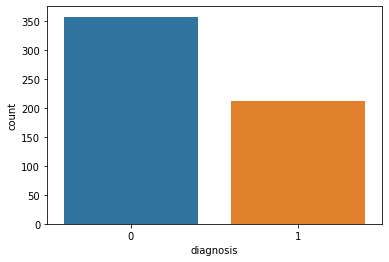

In [451]:
#Map Malignant = 1 and Benign = 0
#df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
df['diagnosis'] = df['diagnosis'].map( {'M' : 1, 'B' : 0} ) 

#Check for overfitting
sns.countplot(x = df['diagnosis'])

df.isna().sum()

#2.**EDA**

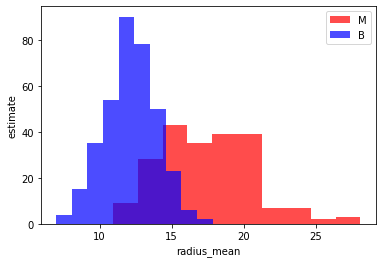

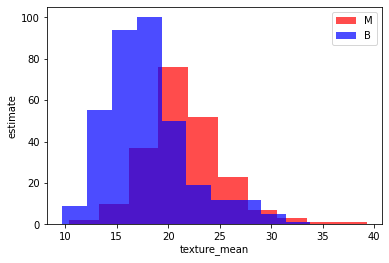

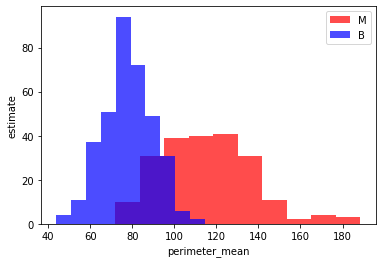

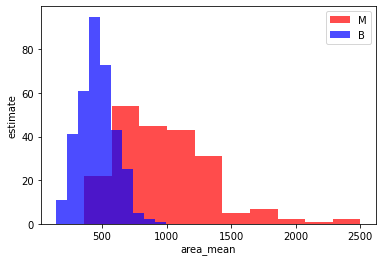

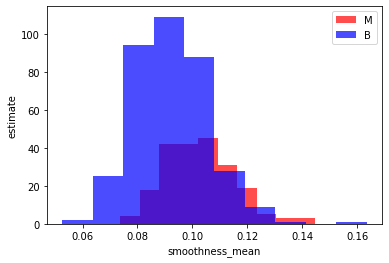

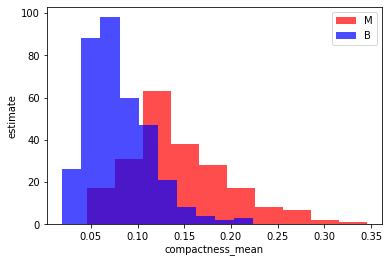

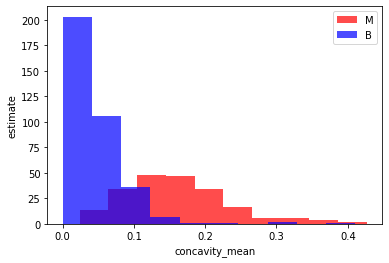

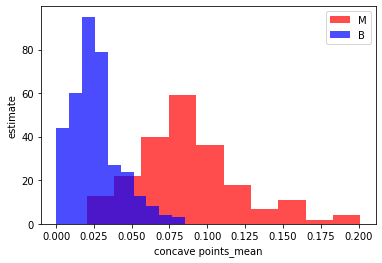

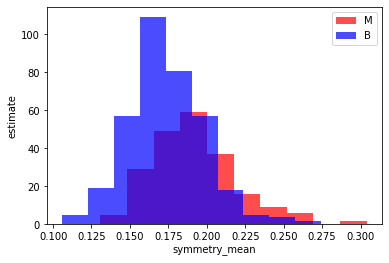

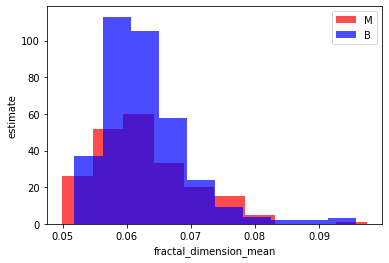

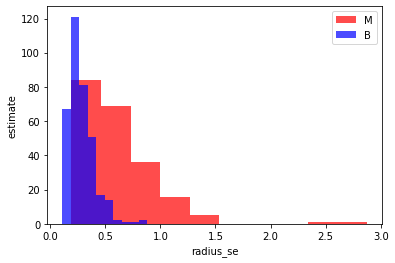

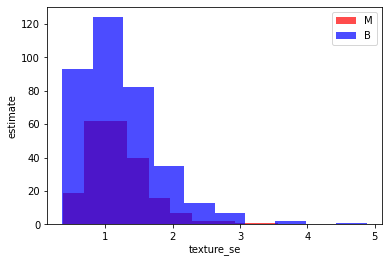

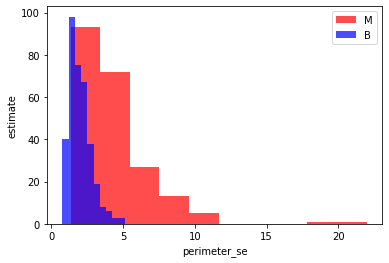

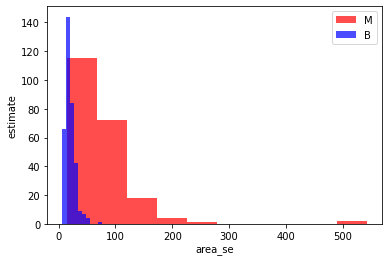

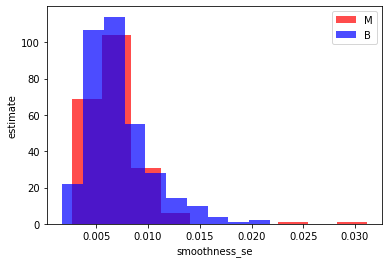

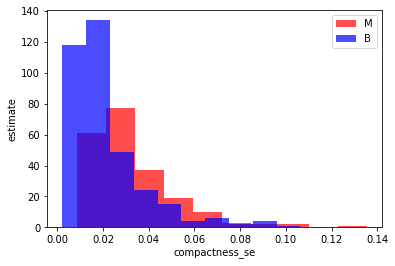

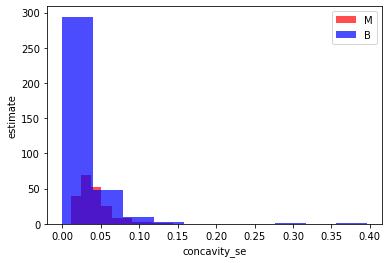

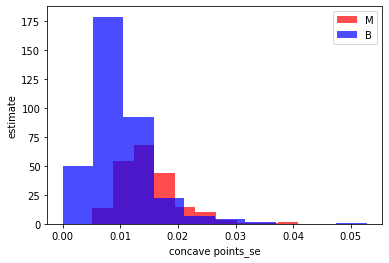

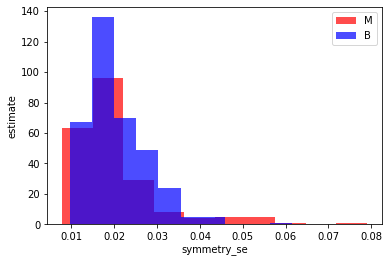

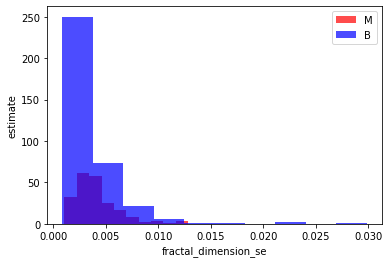

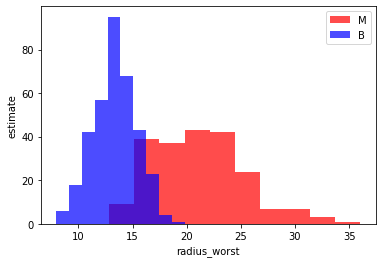

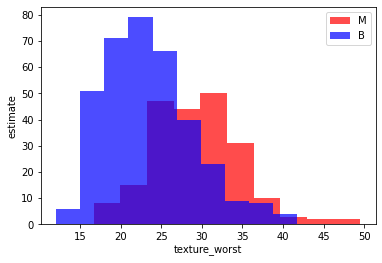

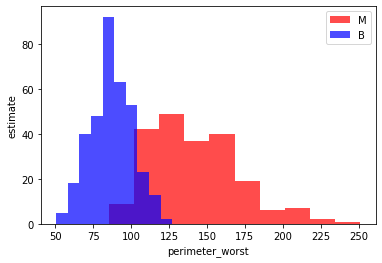

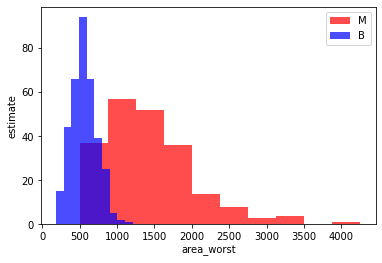

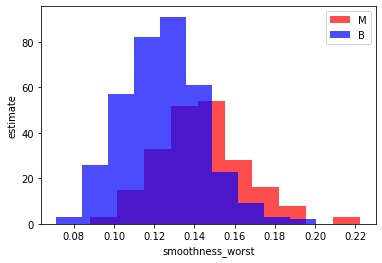

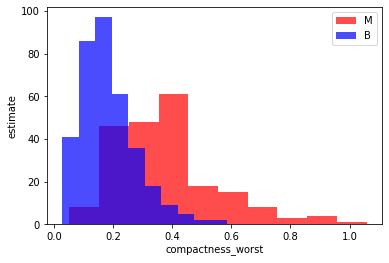

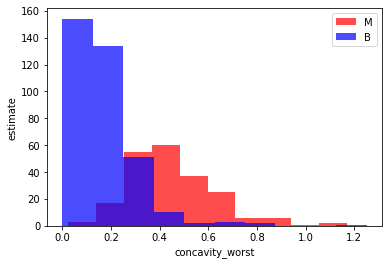

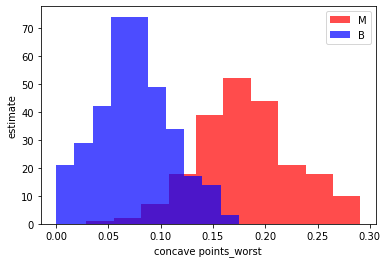

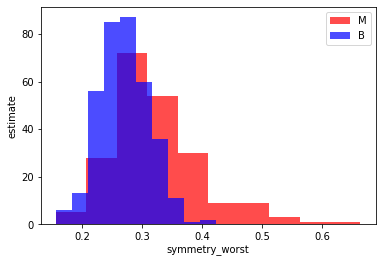

In [452]:



for label in columns[1:-1]:
  plt.hist( df[df['diagnosis'] == 1][label],alpha = 0.7, label = 'M', color = 'red')
  plt.hist( df[df['diagnosis'] == 0][label],alpha = 0.7, label = 'B', color = 'blue')
  plt.xlabel(label)
  plt.ylabel( 'estimate')
  plt.legend()
  plt.show()



SOme of the features the classes are distributed tightly so evaluating them wpuld be difficult as their distribution is close to each other, removing those columns by comparing mean values of the class(benign and Malignant) over features. 

In [453]:
df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se']].groupby('diagnosis').mean()

df[['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
    'smoothness_se','compactness_se', 'concavity_se',
     'concave points_se', 'symmetry_se','fractal_dimension_se',]].groupby('diagnosis').mean()

df[['diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].groupby('diagnosis').mean()

#fractal_dmiension_mean,texture_se,smoothness_se*,compactness_se*,symmetry_se*,fractal_dimension_se*,symmetry_worst*,smoothness_worst*
df.drop(['fractal_dimension_mean','texture_se','smoothness_se','compactness_se','symmetry_se','fractal_dimension_se','symmetry_worst','smoothness_worst'],axis = 1, inplace = True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,0.01587,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,0.01340,24.99,23.41,158.80,1956.0,0.1866,0.2416,0.1860,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,0.02058,23.57,25.53,152.50,1709.0,0.4245,0.4504,0.2430,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,0.01867,14.91,26.50,98.87,567.7,0.8663,0.6869,0.2575,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,0.01885,22.54,16.67,152.20,1575.0,0.2050,0.4000,0.1625,0.07678,1


Heat Map to Visulize any positive negative correlations between the feature variables.

<AxesSubplot:>

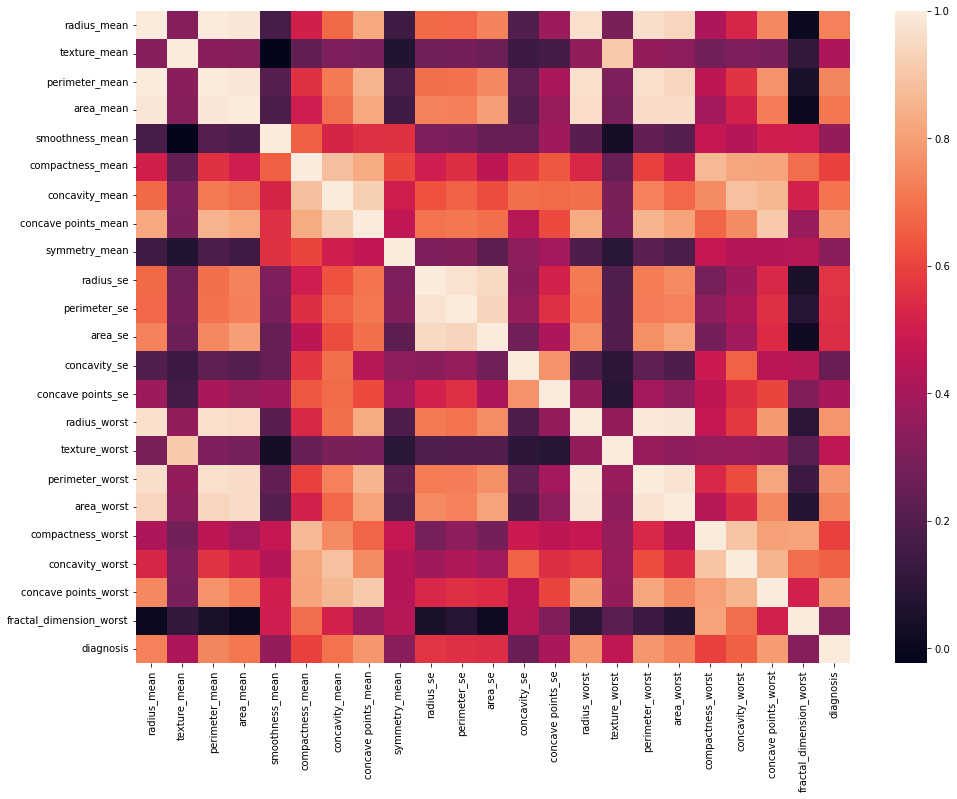

In [454]:
#Correlation Heat maop
fix,axes = plt.subplots(1,1,figsize = (16,12) )
correlation = df.corr()
sns.heatmap(df.corr(),vmax=1,ax = axes)


From the heatmap we can see there is a postitive correlation between radius worst and perimeter mean,smoothness mean. simillarly radius mean with perimeter worst and area worst.

<AxesSubplot:xlabel='radius_mean', ylabel='area_worst'>

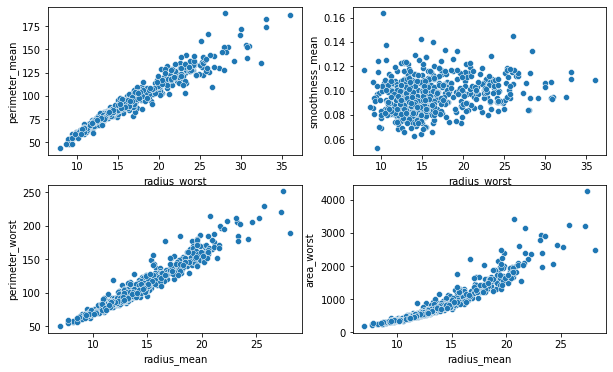

In [455]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.scatterplot(data = df, x = 'radius_worst',y = 'perimeter_mean',ax = axes[0][0])
sns.scatterplot(data = df, x = 'radius_worst',y = 'smoothness_mean',ax = axes[0][1])
sns.scatterplot(data = df, x = 'radius_mean',y = 'perimeter_worst',ax = axes[1][0])
sns.scatterplot(data = df, x = 'radius_mean',y = 'area_worst',ax = axes[1][1])

From the dataset there are more Malignant classes compared to Benign, so to even out and prevent overfitting and under fitting. Upsampling Benign to prevent any bias problems

In [456]:
def train_sample(dataFrame,overSample):
  #Get the features and class seperate
  X = dataFrame.values[:,:-1]
  y = dataFrame.values[:,-1]

#Apple Standard scaler
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

#Oversampling
  if overSample:
    overSampling = RandomOverSampler()
    X,y = overSampling.fit_resample( X , y )

  data = np.hstack((X,y.reshape(-1,1)))

  return data,X, y




#TRAIN,TEST SPLIT. [80 -> train set. 2 -> test set]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'after')]

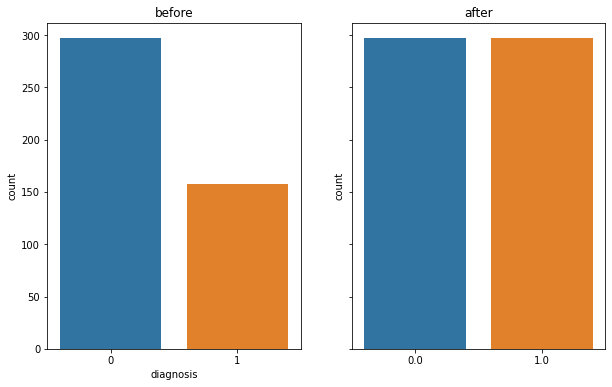

In [457]:
train,test = np.split( df.sample(frac = 1), [ int(0.8 * len(df) )  ] )

#new Sample Count
data_train, X_train, y_train = train_sample(train,True)
data_test, X_test, y_test = train_sample(test,False)


#Compare Sample Counts
fig,axes = plt.subplots(1,2,sharey = True, figsize = (10,6) )
sns.countplot('diagnosis',data = train, ax=axes[0]).set(title = 'before')
sns.countplot(x = y_train,label = 'diagnosis', ax=axes[1]).set(title = 'after')

#Principal Component Analysis

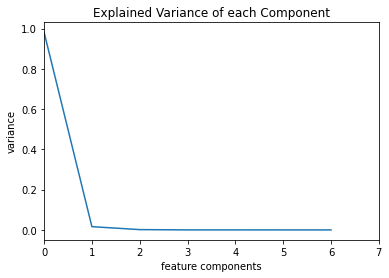

(569, 22)
(569, 7)


In [458]:
#Lets check pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
transform = pca.fit_transform(df.values[:,:-1])
variance = pca.explained_variance_ratio_

plt.plot(variance)
plt.title('Explained Variance of each Component')
plt.xlim(0,7,1)
plt.xlabel('feature components')
plt.ylabel('variance')
plt.show()

print(df.values[:,:-1].shape)
print(transform.shape)

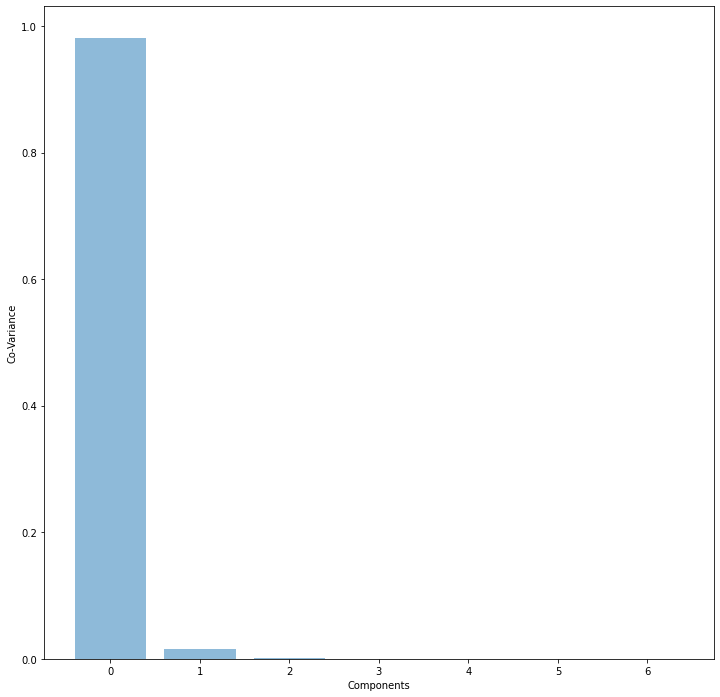

In [459]:
#Checking covaraince of each feature
plt.figure(figsize=(12,12))
plt.bar(range(7),variance,alpha = 0.5,align = 'center')
plt.xlabel('Components')
plt.ylabel('Co-Variance')
plt.show()

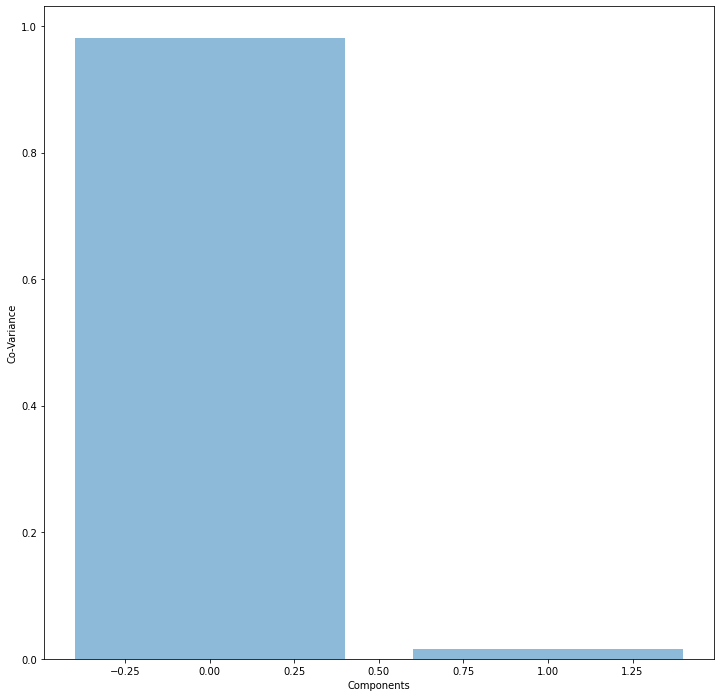

,comp1,comp2,diagnosis
0,1160.142553,-293.917469,1.0
1,1269.122415,15.630324,1.0
2,995.793862,39.156882,1.0
3,-407.180815,-67.380231,1.0
4,930.341155,189.340876,1.0


In [460]:
#thumb rule when 70-80% then stop and use components upto that
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(df.values[:,:-1])
variance = pca.explained_variance_ratio_

#Create dta
pc_df = pd.DataFrame(np.hstack((pca_train,df.values[:,-1].reshape(-1,1))),columns= ['comp1','comp2','diagnosis'])

#Checking covaraince of each feature
plt.figure(figsize=(12,12))
plt.bar(range(2),variance,alpha = 0.5,align = 'center')
plt.xlabel('Components')
plt.ylabel('Co-Variance')
plt.show()
pc_df.head()

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

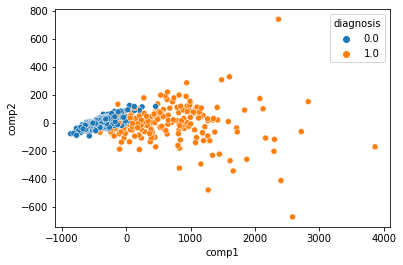

In [461]:
sns.scatterplot( data = pc_df,x = 'comp1',y = 'comp2', hue = 'diagnosis' )

Applying K means -clucstering to see any patterns 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

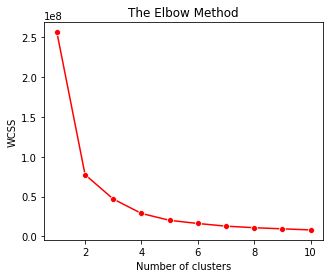

In [462]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,4))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]
0.8330404217926186


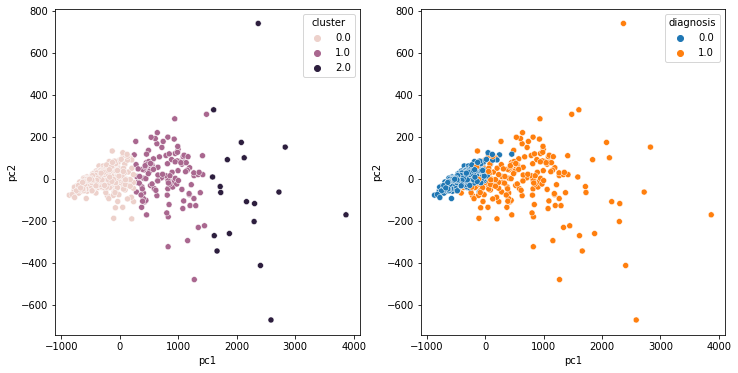

In [463]:
kmeans = KMeans(n_clusters = 3,  random_state = 42)
y_kmeans = kmeans.fit_predict(pca_train)

pca_cluster = pd.DataFrame(np.hstack((pca_train,kmeans.labels_.reshape(-1,1))),columns = ['pc1','pc2','cluster'])
truth_cluster = pd.DataFrame(np.hstack((pca_train,df.values[:,-1].reshape(-1,1))),columns = ['pc1','pc2','diagnosis'])

fig,axes = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(x = pca_cluster.pc1,y = pca_cluster.pc2, hue = pca_cluster.cluster,ax = axes[0])
sns.scatterplot(x = truth_cluster.pc1,y = truth_cluster.pc2, hue = truth_cluster.diagnosis,ax = axes[1])

#
print(np.hstack((df['diagnosis'].values.reshape(-1,1),y_kmeans.reshape(-1,1))))
print(accuracy_score(df['diagnosis'].values.reshape(-1,1),y_kmeans.reshape(-1,1)))

#Model Training**

K Nearest Neigbour

In [464]:
accuracy = []
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9298245614035088
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        60
         1.0       1.00      0.85      0.92        54

    accuracy                           0.93       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.93      0.93       114



Tuning Hyperparemeters and finding the best Model leading to better accuracy

In [465]:
#Trying to tune the hyperparamater using opencv
parameters = {
      'n_neighbors' : range(1,10),
      'weights' : ['uniform', 'distance'],
      'algorithm' :['auto'],
      'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

kNNModel_grid = GridSearchCV( estimator=KNeighborsClassifier(), param_grid=parameters, verbose=0, cv=10, n_jobs=-1)
kNNModel_grid.fit(X_train, y_train)
print(kNNModel_grid.best_estimator_)

y_pred_knn = kNNModel_grid.predict(X_test)
print(f'KNN Accuracy : {accuracy_score(y_test,y_pred_knn)*100}')
print(classification_report(y_test,y_pred_knn))



KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
KNN Accuracy : 92.98245614035088
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        60
         1.0       1.00      0.85      0.92        54

    accuracy                           0.93       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.93      0.93       114



Logistic Regression

In [466]:
accuracy = []
clf = LogisticRegression()
clf.fit(X_train,y_train)

y_pred_lr = clf.predict(X_test)
#print(np.hstack((y_test.reshape(-1,1),y_pred.reshape(-1,1))))
print(f'Logistic Regression Accuracy : {accuracy_score(y_test,y_pred_lr)* 100}')
print(classification_report(y_test,y_pred_lr))


Logistic Regression Accuracy : 94.73684210526315
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        60
         1.0       1.00      0.89      0.94        54

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



SVM Model

In [467]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf','poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
  
#fitting the model for grid search
grid.fit(X_train, y_train,)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

model = SVC(gamma= 0.1, C = 10, kernel = 'rbf')
model.fit(X_train,y_train)
print(f'SVM Model Accuracy : {accuracy_score(y_test,model.predict(X_test))*100}')



{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
SVM Model Accuracy : 91.22807017543859


Naive Bayes

Gaussian Naive Bayes  Model Accuracy : 87.71929824561403
Training set score: 0.9411
Test set score: 0.8772


<AxesSubplot:>

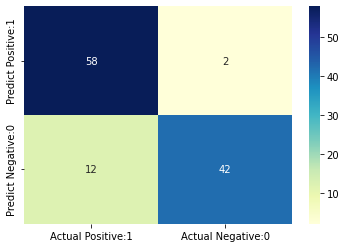

In [468]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print(f'Gaussian Naive Bayes  Model Accuracy : {accuracy_score(y_test,y_pred_gnb)*100}')

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_gnb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')


Sequential Neural Nerwork using Adam


In [469]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.grid('true')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.grid('true')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

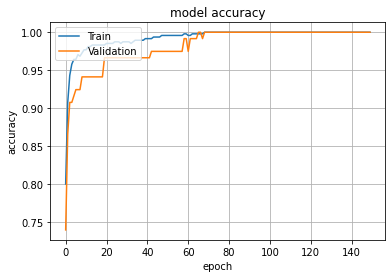

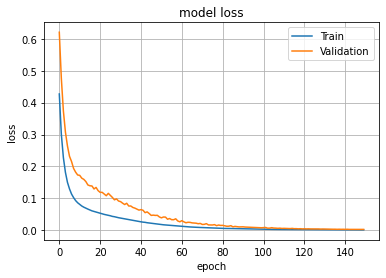

In [470]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation = 'relu', input_shape = (22,)),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

history = nn_model.fit(
    X_train,y_train,batch_size = 32,epochs=150,validation_split=0.2,verbose = 0
    )
plot_accuracy(history)
plot_loss(history)

In [471]:
y_pred_nn = model.predict(X_test)
#print(np.hstack((y_test.reshape(-1,1),y_pred.reshape(-1,1))))
model.score(X_test,y_test)
print(accuracy_score(y_test,y_pred_nn)*100)

91.22807017543859


#Results

In [487]:
#comparing the accuracy over the various  training models
accuracy = []
accuracy.append(['KNN',accuracy_score(y_test,y_pred_knn)*100])
accuracy.append(['LOGISTIC',accuracy_score(y_test,y_pred_lr)*100])
accuracy.append(['SVM',accuracy_score(y_test,model.predict(X_test))*100])
accuracy.append(['NAIVE_BAYES',accuracy_score(y_test,y_pred_gnb)*100])
accuracy.append(['SEQ_NN',accuracy_score(y_test,y_pred_nn)*100])
print(accuracy)

acc_data = pd.DataFrame(accuracy, columns = ['MODEL','ACCURACY'])
acc_data

[['KNN', 92.98245614035088], ['LOGISTIC', 94.73684210526315], ['SVM', 91.22807017543859], ['NAIVE_BAYES', 87.71929824561403], ['SEQ_NN', 91.22807017543859]]


,MODEL,ACCURACY
0,KNN,92.982456
1,LOGISTIC,94.736842
2,SVM,91.228070
3,NAIVE_BAYES,87.719298
4,SEQ_NN,91.228070


#PLotting the accuracy of the models

<AxesSubplot:xlabel='MODEL', ylabel='ACCURACY'>

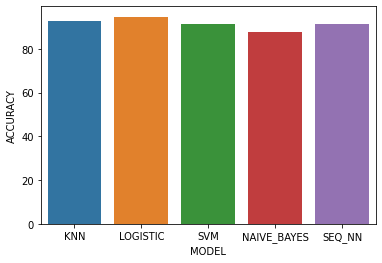

In [512]:
sns.barplot(x = acc_data.MODEL, y = acc_data.ACCURACY)
